In [5]:
#importing the dataset by code google colab provide a package called files which u can use to choose any files from local disk
from google.colab import files
uploaded = files.upload()

Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


In [7]:
#importing neccessary libraries like numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading the dataset by the help of pandas
dataset = pd.read_csv('rainfall.csv')
#printing first five columns
dataset.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [8]:
#for information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [38]:
#removing the null values by dropna method and from original dataset by using inplace=True
dataset.dropna(inplace=True)
dataset.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [14]:
#accessing the intrested region from data from dataset
marathwada = dataset.loc[dataset['SUBDIVISION']=='MATATHWADA']
vidarbh = dataset.loc[dataset['SUBDIVISION']=='VIDARBHA']
#reading marathwada rainfall year and annual
x1 = marathwada['YEAR']
x1.drop(columns=['YEAR'])
y1 = marathwada['ANNUAL']
#reading punjab
x = vidarbh['YEAR']
x.drop(columns=['YEAR'])
y = vidarbh['ANNUAL']
y.head()

2852    1093.3
2853     748.9
2854    1229.4
2855     753.2
2856     941.8
Name: ANNUAL, dtype: float64

In [18]:
#finding the shape of the array
x1.shape, y1.shape
x.shape, y.shape

((115,), (115,))

[]

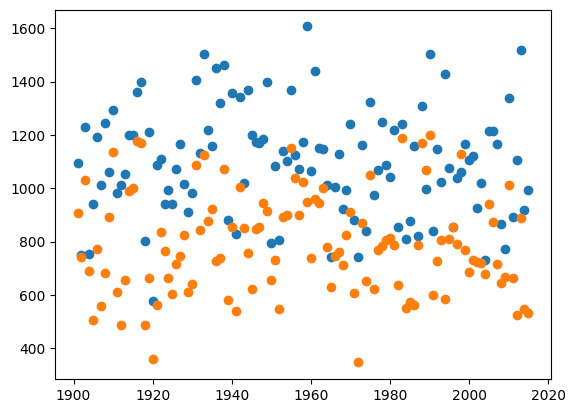

In [19]:
#just a simple scatter graph to print both region at a time
plt.scatter(x, y)
plt.scatter(x1, y1)
plt.plot()

In [20]:
#applying linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
x1 = np.array(x1).reshape(-1, 1)
y1 = np.array(y1).reshape(-1, 1)
model.fit(x, y)
model.fit(x1, y1)

LinearRegression()

[]

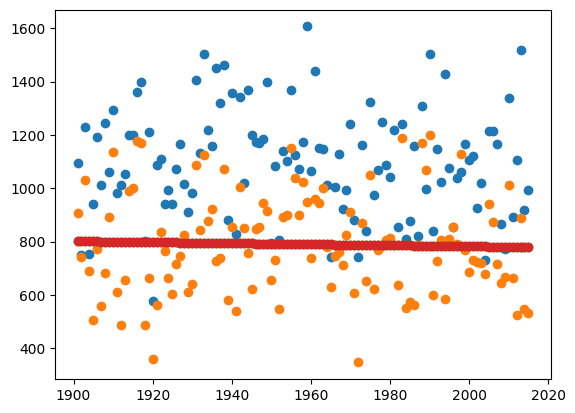

In [21]:
#The intercept_ attribute of the LinearRegression model returns the y-intercept (value of y when x is 0) of the fitted linear regression line. The coef_ attribute returns the coefficient (slope) of the fitted linear regression line.
b = model.intercept_
m = model.coef_
plt.scatter(x, y)
plt.scatter(x1, y1)
plt.scatter(x, m*x+b)
plt.scatter(x1, m*x1+b)
plt.plot()

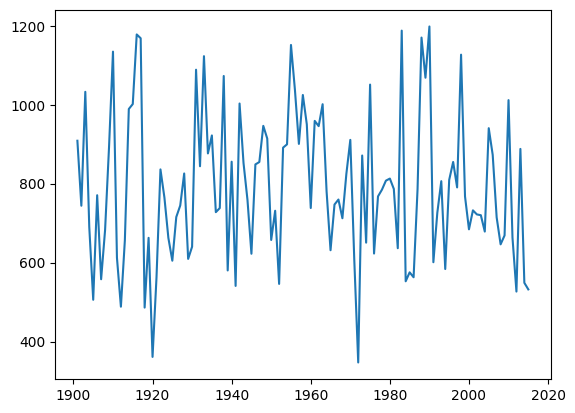

In [26]:
dataset = marathwada.sort_values(by='YEAR')
year = dataset['YEAR']
annual = dataset['ANNUAL']
plt.plot(year, annual)
plt.show()

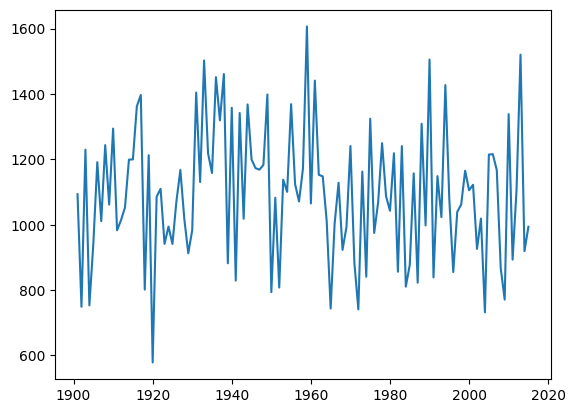

In [27]:
dataset = vidarbh.sort_values(by='YEAR')
year1 = dataset['YEAR']
annual1 = dataset['ANNUAL']
plt.plot(year1, annual1)
plt.show()


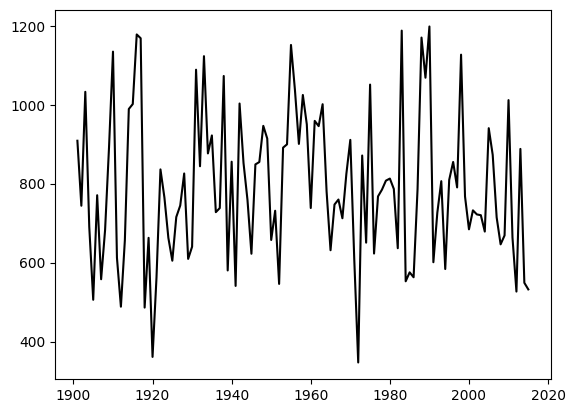

<function matplotlib.pyplot.show(close=None, block=None)>

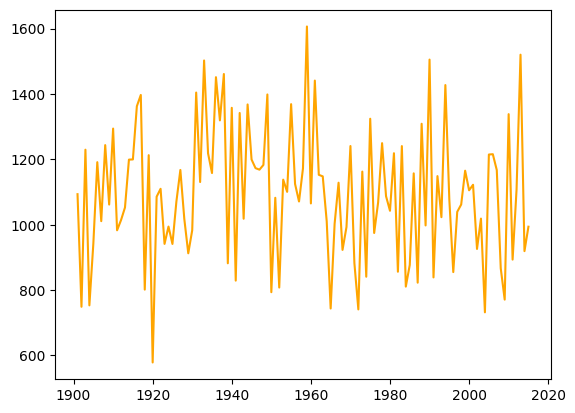

In [31]:
plt.plot(year, annual, color='black')
plt.show()
plt.plot(year1, annual1, color='orange')
plt.show

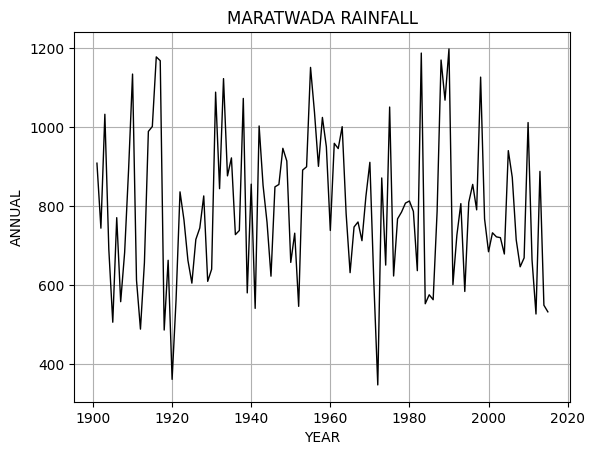

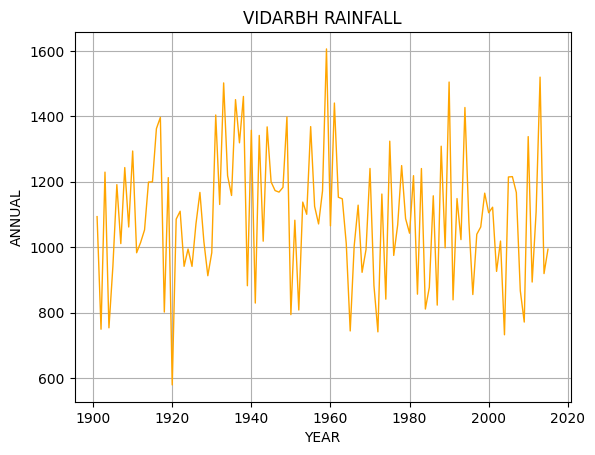

In [33]:
plt.plot(year, annual, linewidth=1, color='black')
plt.xlabel('YEAR')
plt.ylabel('ANNUAL')
plt.title('MARATWADA RAINFALL')
plt.grid(True)
plt.show()
#printint graph of vidarbh
plt.plot(year1, annual1, linewidth=1, color='orange')
plt.xlabel('YEAR')
plt.ylabel('ANNUAL')
plt.title('VIDARBH RAINFALL')
plt.grid(True)
plt.show()

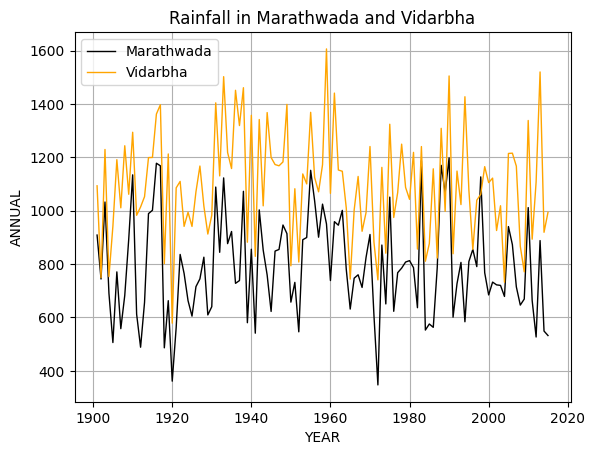

In [34]:
plt.plot(year, annual, linewidth=1, color='black', label='Marathwada')
plt.plot(year1, annual1, linewidth=1, color='orange', label='Vidarbha')
plt.xlabel('YEAR')
plt.ylabel('ANNUAL')
plt.title('Rainfall in Marathwada and Vidarbha')
plt.grid(True)
plt.legend()
plt.show()
